In [1]:
import numpy as np
from numpy import argmax
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.utils import np_utils, to_categorical, plot_model

Using TensorFlow backend.


In [2]:
train_data_dir = "C:/Users/lorin/Desktop/Università/Laboratorio di Intelligenza Artificiale e Grafica Interattiva/homework_5/DITS-classification/DITS-classification/classification train"
test_data_dir = 'C:/Users/lorin/Desktop/Università/Laboratorio di Intelligenza Artificiale e Grafica Interattiva/homework_5/DITS-classification/DITS-classification/classification test'

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [3]:
batch_size = 128
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)
epochs = 50

train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42,
)

valid_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=1159,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 5992 images belonging to 59 classes.
Found 1497 images belonging to 59 classes.
Found 1159 images belonging to 59 classes.


In [4]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(64,kernel_size=(5,5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(59,activation='relu'))
    model.add(Dense(59,activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    model.summary()
    plot_model(model)
    return model

In [5]:
model = prepare_model()
history = model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

46/46 [==============================] - 13s 274ms/step - loss: 0.1687 - accuracy: 0.9434 - val_loss: 0.8349 - val_accuracy: 0.7969
Epoch 48/50
46/46 [==============================] - 12s 259ms/step - loss: 0.1654 - accuracy: 0.9499 - val_loss: 0.7846 - val_accuracy: 0.8181
Epoch 49/50
46/46 [==============================] - 12s 271ms/step - loss: 0.1542 - accuracy: 0.9504 - val_loss: 0.9261 - val_accuracy: 0.8082
Epoch 50/50
46/46 [==============================] - 13s 292ms/step - loss: 0.1717 - accuracy: 0.9447 - val_loss: 0.8093 - val_accuracy: 0.8196


Saved trained model at C:/Users/lorin/Desktop/Università/Laboratorio di Intelligenza Artificiale e Grafica Interattiva/homework_5/results\DITS_model.h5 


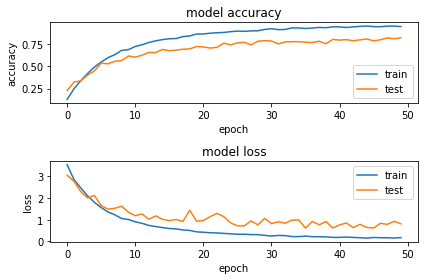

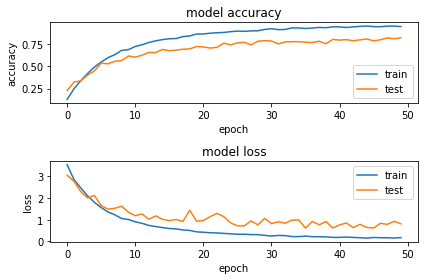

In [6]:
save_dir = "C:/Users/lorin/Desktop/Università/Laboratorio di Intelligenza Artificiale e Grafica Interattiva/homework_5/results"
model_name = 'DITS_model.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [7]:
dits_model = load_model('C:/Users/lorin/Desktop/Università/Laboratorio di Intelligenza Artificiale e Grafica Interattiva/homework_5/results/DITS_model.h5')
loss_and_metrics = dits_model.evaluate_generator(test_generator)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 2.2698371410369873
Test Accuracy 0.6419327259063721


In [8]:
X_test, Y_test = test_generator[0][0], test_generator[0][1]

predicted_classes = dits_model.predict_classes(X_test)

y_test = np.empty(len(Y_test), dtype=int)
for i in range(len(Y_test)):
    y_test[i] = (np.where(Y_test[i]==1)[0][0])
    
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


744  classified correctly
415  classified incorrectly


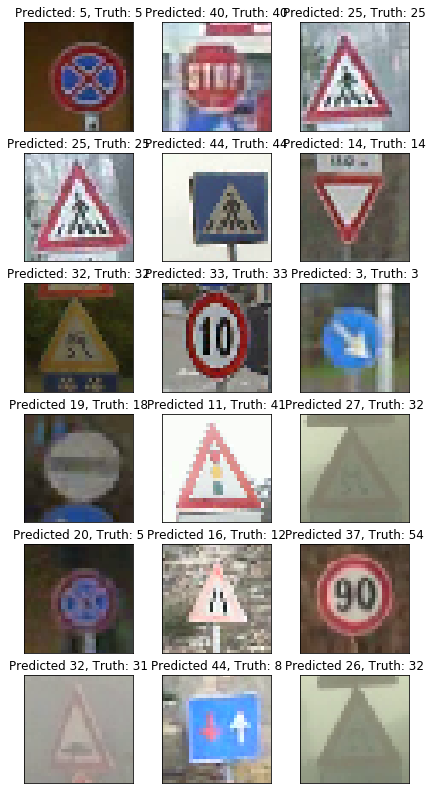

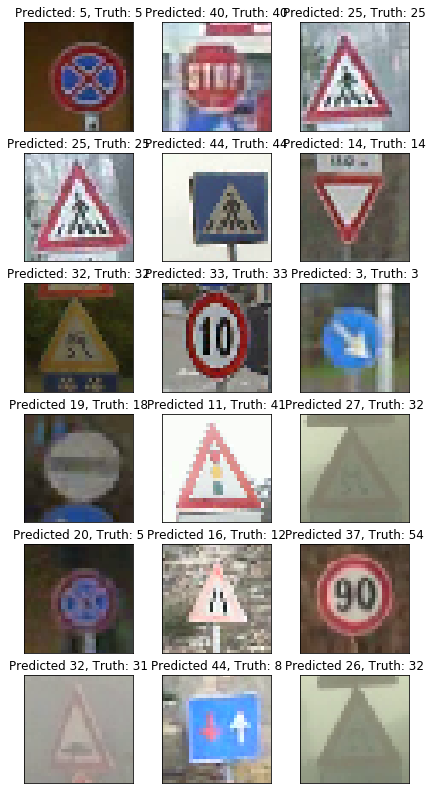

In [12]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct], interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect], interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation